In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.visualization import astropy_mpl_style
import pandas as pd

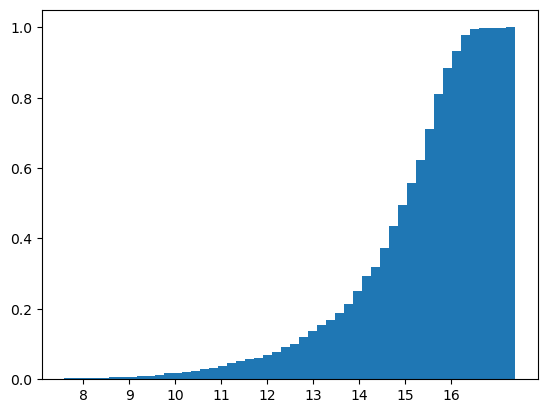

<Axes: ylabel='Frequency'>

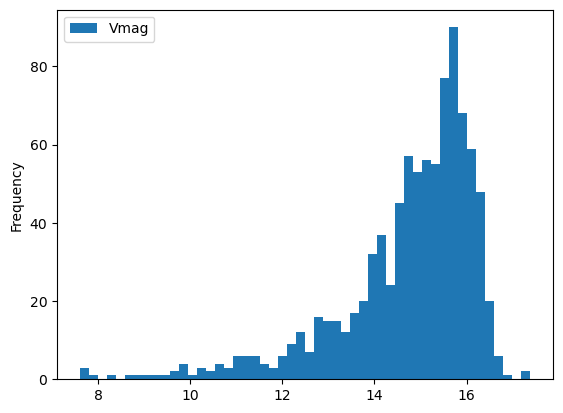

In [43]:
data = pd.read_csv("apass.csv", usecols=["Vmag", "RAJ2000", "DEJ2000", "B-V"])
#mask = (data["Vmag"] < 16) & (data["Vmag"] > 10)
#data = data[mask].dropna()

df = pd.read_csv('apass.csv')
df.dropna(inplace=True)
vmag = df["Vmag"].values
x = df['RAJ2000'].values
y = df['DEJ2000'].values
bv = df["B-V"].values

v_array = data["Vmag"].to_numpy()
ra_array = data["RAJ2000"].to_numpy()
de_array = data["DEJ2000"].to_numpy()
bv_array = data["B-V"].to_numpy()

plt.xticks(np.arange(1, 17 , 1))
plt.hist(vmag, bins=50, cumulative=True, density=True)
plt.show()
data.plot(kind="hist", bins=50, y="Vmag")

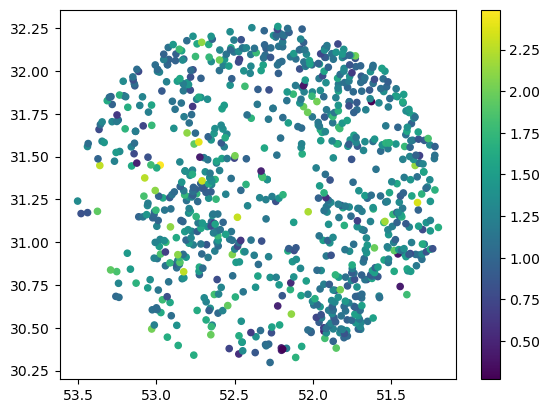

In [28]:
#data.dropna()
#data.plot(kind="scatter", x="RAJ2000", y="DEJ2000", colorbar=True, c=("B-V"))

plt.scatter(ra_array, de_array, c=bv_array, s=20)
plt.colorbar()
plt.gca().invert_xaxis()

Selected points: 43


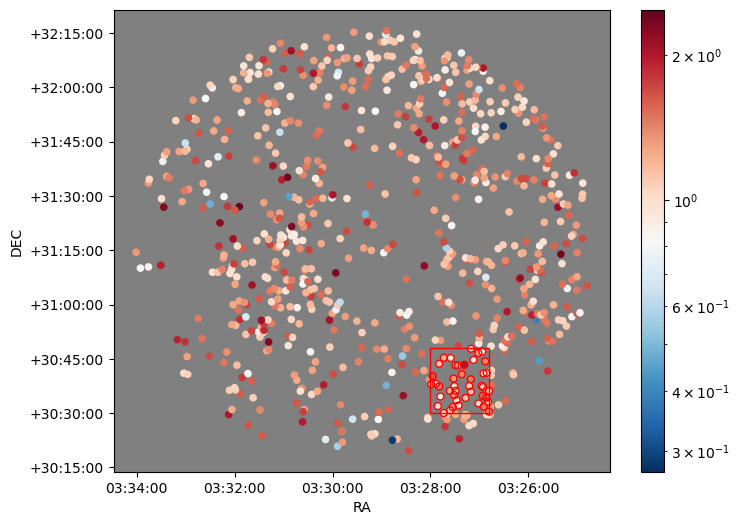

In [29]:
mag_mask = vmag < 16
df = df[mag_mask]

vmag = df["Vmag"].values
x = df['RAJ2000'].values
y = df['DEJ2000'].values
bv = df["B-V"].values

fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(x, y, s=20, cmap='RdBu_r', c=bv, norm='log')  # color by whatever you like

# define rectangle: lower-left corner (xmin, ymin) and width/height
xmin, ymin = 51.7, 30.5
width, height = 0.3, 0.3
rect = Rectangle((xmin, ymin), width, height, edgecolor='red', facecolor='none', linewidth=1)
ax.add_patch(rect)

# boolean mask to get points inside
mask = (x >= xmin) & (x <= xmin + width) & (y >= ymin) & (y <= ymin + height)
selected_df = df[mask]          # dataframe of the selected points
print("Selected points:", len(selected_df))

def ra_formatter(deg, pos=None):
    # deg is tick position in degrees -> show as HH:MM:SS
    a = Angle(deg * u.deg)
    # precision=1 shows seconds to 0.1s; use 0 for integer seconds
    return a.to_string(unit=u.hourangle, sep=':', precision=0, pad=True)

def dec_formatter(deg, pos=None):
    a = Angle(deg * u.deg)
    return a.to_string(unit=u.degree, sep=':', precision=0, alwayssign=True, pad=True)

ax.xaxis.set_major_formatter(FuncFormatter(ra_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(dec_formatter))

# highlight selected points on the plot
ax.scatter(x[mask], y[mask], facecolors='none', edgecolors='red', s=25)
ax.set_xlabel('RA'); ax.set_ylabel('DEC')
ax.set_facecolor("grey")
fig.colorbar(sc)
plt.gca().invert_xaxis()
plt.show()
# now selected_df contains the rows that fell inside the rectangle

In [30]:
mean_bv = np.mean(selected_df["B-V"].values)
std_bv = np.std(selected_df["B-V"].values)
print(mean_bv)
print(std_bv)

1.1616046511627904
0.2513113643248785


In [31]:
corr_bv = df["B-V"].values - mean_bv

def red_law(R_v, bv):
    a_v = R_v * bv
    return a_v

Maximum Extinciton of: 4.114925581395349
Minimum Extinciton of: -2.7608744186046503
Mean Extinction of: 0.35315869131492067
Corrected mean Extinction of: 0.9866974282421965



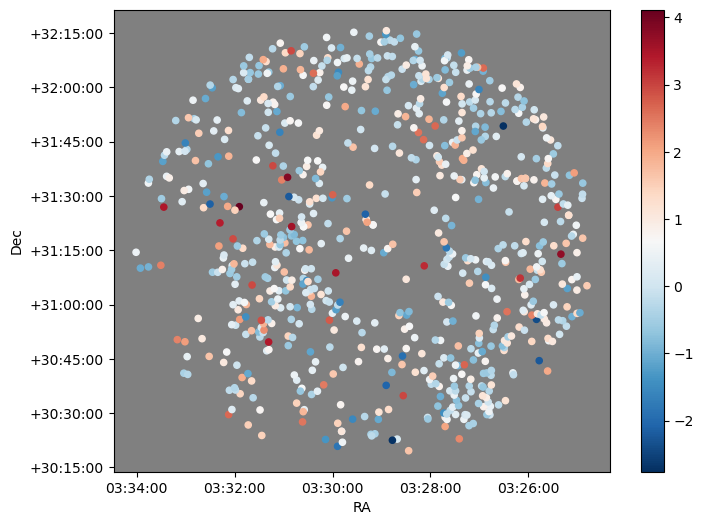

In [41]:
R_v = 3.1
fig, ax = plt.subplots(figsize=(8,6))
ex_map = red_law(R_v, corr_bv)
sc = ax.scatter(x, y, s=20, cmap='RdBu_r', c=ex_map)  # color by whatever you like

max_ex = max(ex_map)
min_ex = min(ex_map)
mean_ex = np.mean(ex_map)

print(f"Maximum Extinciton of: {max_ex}")
print(f"Minimum Extinciton of: {min_ex}")
print(f"Mean Extinction of: {mean_ex}")
mean_mask = ex_map >= 0
mean_ex = np.mean(ex_map[mean_mask])

print(f"Corrected mean Extinction of: {mean_ex}\n")
ax.xaxis.set_major_formatter(FuncFormatter(ra_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(dec_formatter))

ax.set_xlabel('RA'); ax.set_ylabel('Dec')
fig.colorbar(sc)
ax.set_facecolor("grey")
plt.gca().invert_xaxis()
plt.show()